In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("output/combined_transaction_geolocation_poi_sample1000.csv")
data['Transaction Price'] = data['Transaction Price  ']
data['Transaction Price'] = data['Transaction Price  '].replace({'RM': '', ',': ''}, regex=True).astype(float)
data['Main Floor Area'] = pd.to_numeric(data['Main Floor Area'], errors='coerce').fillna(0)
data['Land/Parcel Area'] = pd.to_numeric(data['Land/Parcel Area'], errors='coerce').fillna(0)
data.head()

,Property Type,District,Mukim,Scheme Name/Area,Road Name,"Month, Year of Transaction Date",Tenure,Land/Parcel Area,Unit,Main Floor Area,...,school,kindergarten,university,hospital,clinic,supermarket,place_of_worship,bus_station,marketplace,Transaction Price
0,Low-Cost House,Dungun,Kuala Paka,TMN MURNI PERDANA,OFF JLN PAKA-DUNGUN,May 2024,Freehold,111.0,sq.m,54.0,...,No,No,No,No,No,No,No,No,No,120000.0
1,Low-Cost House,Kuala Muda,Sungai Petani,TMN DESA AMAN (SG LALANG) FASA 3,TAMAN DESA AMAN,April 2024,Freehold,136.0,sq.m,71.0,...,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,200000.0
2,2 - 2 1/2 Storey Terraced,Petaling,Damansara,"BUKIT JELUTONG, SHAH ALAM",JLN MIMBAR U8/2A,June 2024,Freehold,198.0,sq.m,179.0,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,850000.0
3,2 - 2 1/2 Storey Terraced,Hulu Langat,Hulu Langat,TMN SURIA RESIDEN,JLN SURIA RESIDEN 1/1,February 2024,Freehold,156.0,sq.m,156.0,...,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,999000.0
4,2 - 2 1/2 Storey Terraced,Petaling,Bukit Raja,BANDAR SETIA ALAM,JLN SETIA DAMAI U13/15D,April 2024,Freehold,189.0,sq.m,176.0,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,955000.0


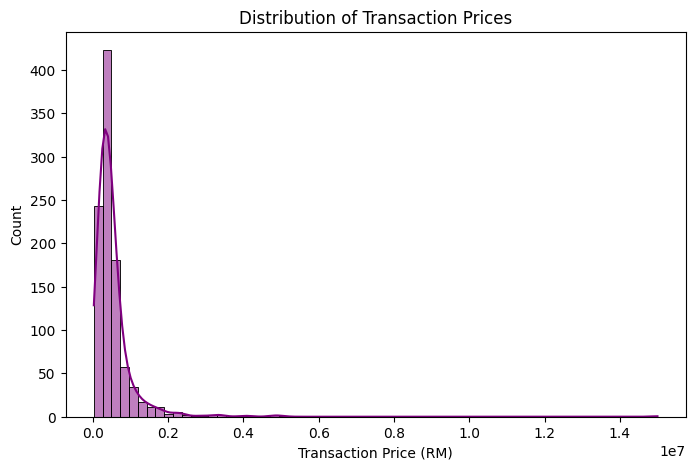

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(data['Transaction Price'], kde=True, color='purple')
plt.title("Distribution of Transaction Prices")
plt.xlabel("Transaction Price (RM)")
plt.show()

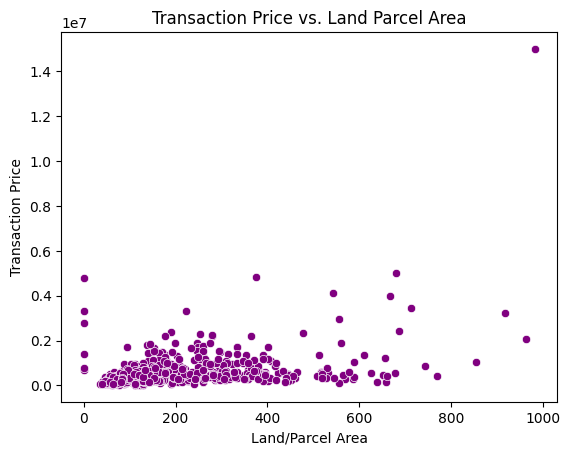

In [15]:
sns.scatterplot(x='Land/Parcel Area', y='Transaction Price', data=data, color='purple')
plt.title("Transaction Price vs. Land Parcel Area")
plt.show()


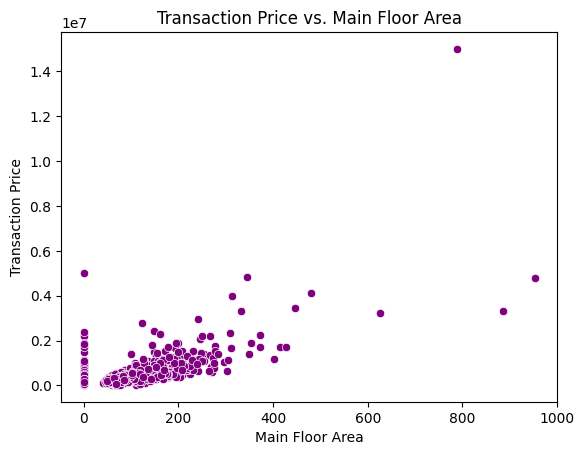

In [16]:
sns.scatterplot(x='Main Floor Area', y='Transaction Price', data=data, color='purple')
plt.title("Transaction Price vs. Main Floor Area")
plt.show()


In [17]:
data.groupby('District')['Transaction Price'].mean().sort_values(ascending=False)


District
Penampang          2.200000e+06
Putrajaya          1.664000e+06
Kuala Lumpur       1.141828e+06
Sepang             9.579333e+05
Labuan             8.500000e+05
                       ...     
Gua Musang         1.000000e+05
Jelebu             9.000000e+04
Maran              9.000000e+04
Bera               4.900000e+04
Hulu Terengganu    2.500000e+04
Name: Transaction Price, Length: 104, dtype: float64

In [19]:
amenity_columns = ['school', 'kindergarten', 'university', 'hospital', 'clinic',
                   'supermarket', 'place_of_worship', 'bus_station', 'marketplace']

for col in amenity_columns:
    print(col, data.groupby(col)['Transaction Price'].mean())


school school
No     423359.060403
Yes    571149.572650
Name: Transaction Price, dtype: float64
kindergarten kindergarten
No     414570.405728
Yes    608266.781411
Name: Transaction Price, dtype: float64
university university
No     426669.595782
Yes    659705.336427
Name: Transaction Price, dtype: float64
hospital hospital
No     413791.479821
Yes    618333.935018
Name: Transaction Price, dtype: float64
clinic clinic
No     407204.204204
Yes    586970.014993
Name: Transaction Price, dtype: float64
supermarket supermarket
No    527108.0
Name: Transaction Price, dtype: float64
place_of_worship place_of_worship
No     425762.068966
Yes    568502.816901
Name: Transaction Price, dtype: float64
bus_station bus_station
No     452928.571429
Yes    606827.800830
Name: Transaction Price, dtype: float64
marketplace marketplace
No     429645.083933
Yes    596819.897084
Name: Transaction Price, dtype: float64


In [39]:
amenity_columns = ['school', 'kindergarten', 'university', 'hospital', 'clinic',
                   'supermarket', 'place_of_worship', 'bus_station', 'marketplace']

results = []

for col in amenity_columns:
    mean_with = data[data[col] == 'Yes']['Transaction Price'].median()
    mean_without = data[data[col] == 'No']['Transaction Price'].median()
    
    if pd.notna(mean_with) and pd.notna(mean_without) and mean_without != 0:
        percentage_diff = ((mean_with - mean_without) / mean_without) * 100
        results.append({
            'Amenity': col,
            'Avg Price With Amenity': mean_with,
            'Avg Price Without Amenity': mean_without,
            'Percentage Difference (%)': percentage_diff
        })

# Convert to DataFrame for easier sorting/display
results_df = pd.DataFrame(results)

# Sort by percentage difference descending
results_df = results_df.sort_values(by='Percentage Difference (%)', ascending=False)

# Display top 6
print(results_df.head(6))


        Amenity  Avg Price With Amenity  Avg Price Without Amenity  \
2    university                450000.0                   350000.0   
1  kindergarten                430000.0                   340000.0   
4        clinic                420000.0                   336000.0   
3      hospital                431000.0                   350000.0   
7   marketplace                420000.0                   350000.0   
0        school                407000.0                   349500.0   

   Percentage Difference (%)  
2                  28.571429  
1                  26.470588  
4                  25.000000  
3                  23.142857  
7                  20.000000  
0                  16.452074  


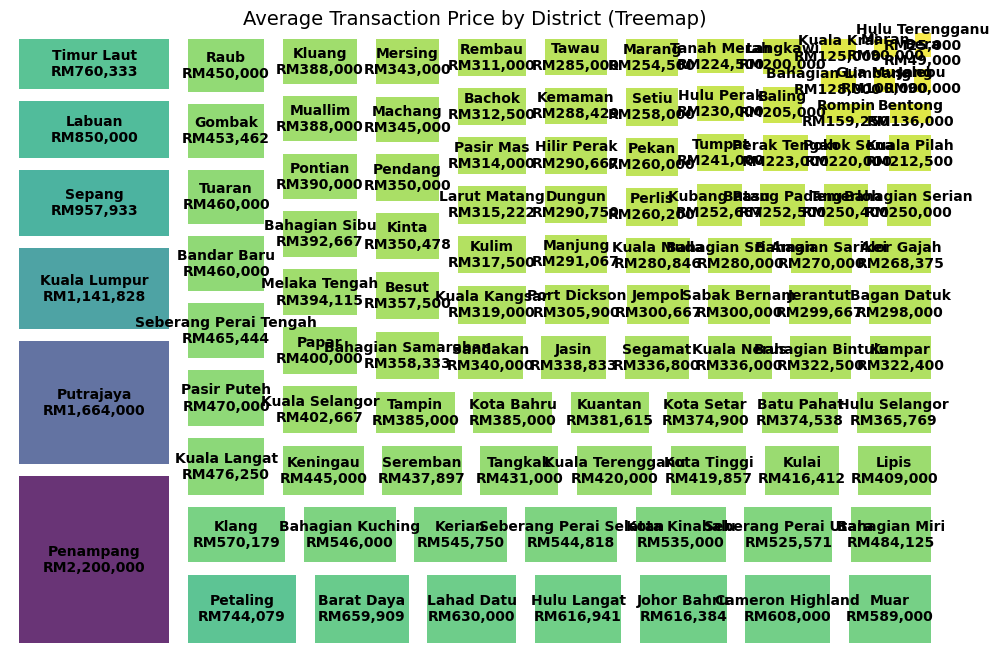

In [28]:
import squarify

# Calculate mean transaction price per district
mean_prices = data.groupby('District')['Transaction Price'].mean().sort_values(ascending=False)

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=mean_prices.values,
    label=[f"{district}\nRM{price:,.0f}" for district, price in zip(mean_prices.index, mean_prices.values)],
    color=plt.cm.viridis_r(mean_prices.values / max(mean_prices.values)),  # Color by value
    alpha=0.8,
    pad=True,
    text_kwargs={'fontsize': 10, 'weight': 'bold'}
)

plt.title("Average Transaction Price by District (Treemap)", fontsize=14)
plt.axis('off')
plt.show()

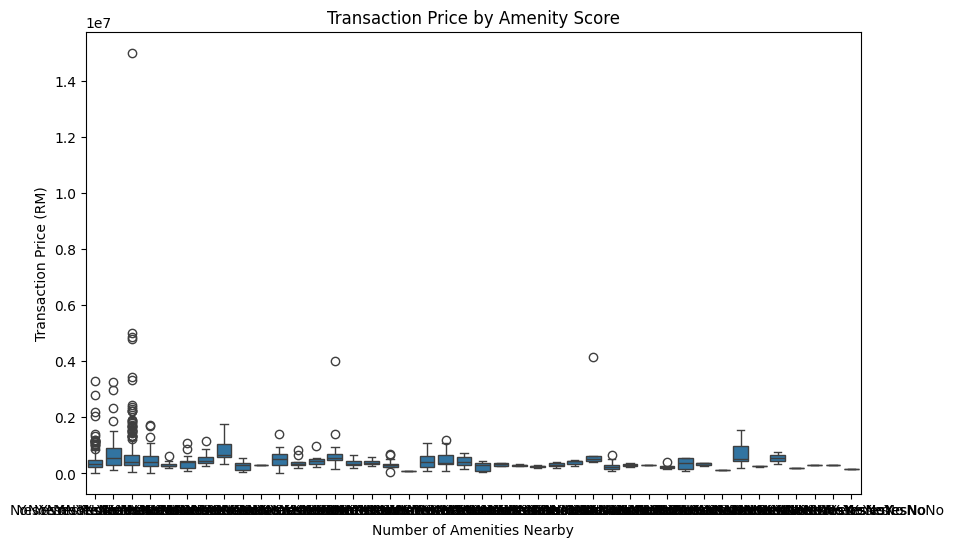

In [29]:
data['Amenity Score'] = data[['school', 'kindergarten', 'university', 'hospital', 'clinic',
                              'supermarket', 'place_of_worship', 'bus_station', 'marketplace']].sum(axis=1)

import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x='Amenity Score', y='Transaction Price', data=data)
plt.title("Transaction Price by Amenity Score")
plt.xlabel("Number of Amenities Nearby")
plt.ylabel("Transaction Price (RM)")
plt.show()


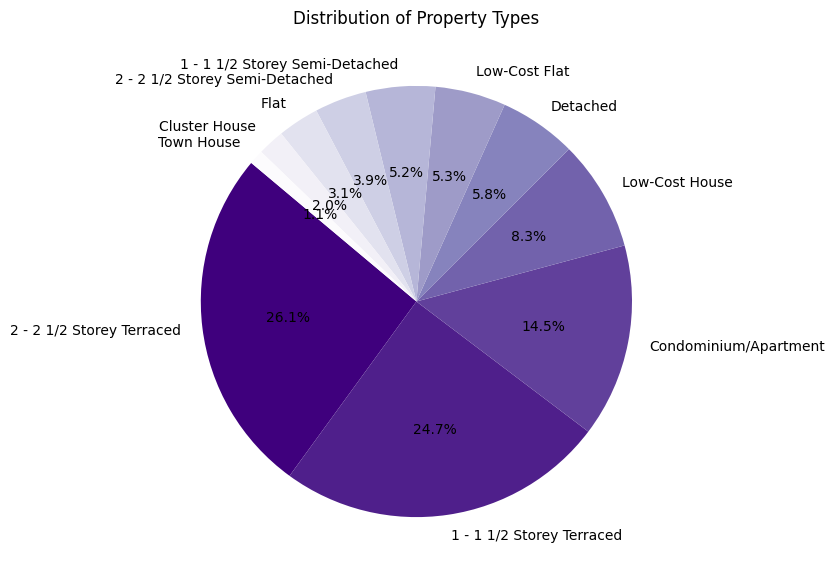

In [31]:
import numpy as np

property_counts = data['Property Type'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Purples_r(np.linspace(0,1,len(property_counts))))
plt.title("Distribution of Property Types")
plt.show()


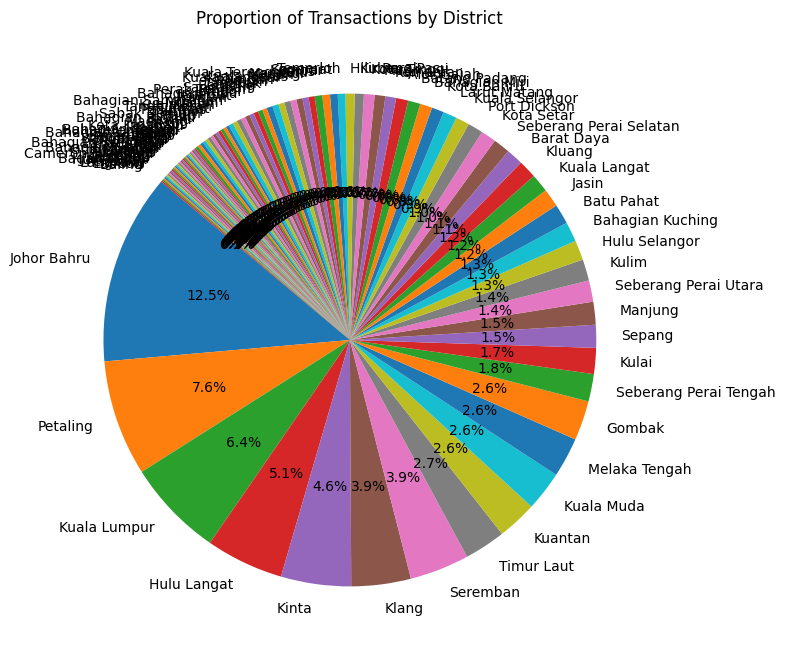

In [32]:
district_counts = data['District'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(district_counts, labels=district_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Transactions by District")
plt.show()


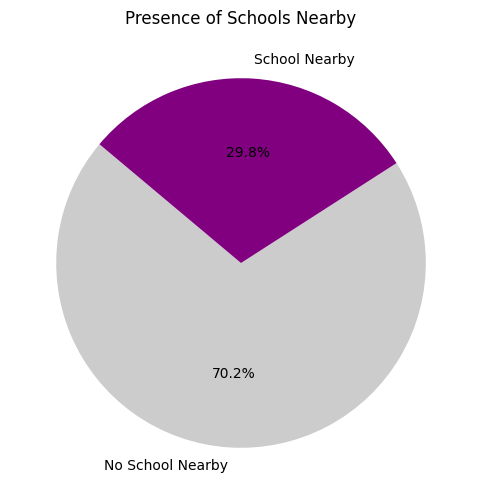

In [33]:
school_presence = data['school'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(school_presence, labels=['No School Nearby', 'School Nearby'], autopct='%1.1f%%', startangle=140, colors=['#cccccc', '#800080'])
plt.title("Presence of Schools Nearby")
plt.show()


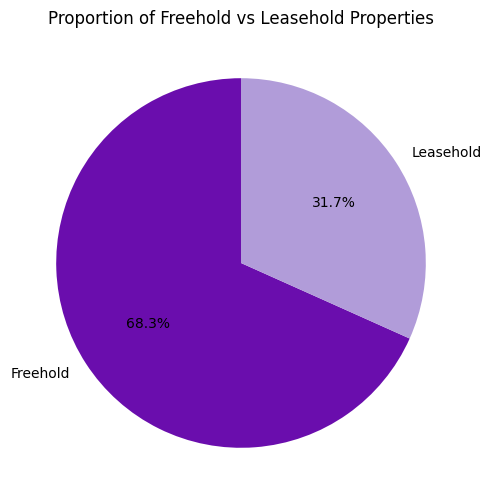

In [34]:
tenure_counts = data['Tenure'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=90, colors=['#6a0dad','#b19cd9'])
plt.title("Proportion of Freehold vs Leasehold Properties")
plt.show()


In [42]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Force rendering in browser window
pio.renderers.default = 'browser'

data['Transaction Price'] = data['Transaction Price'].replace({'RM': '', ',': ''}, regex=True).astype(float)
mean_prices = data.groupby('District')['Transaction Price'].mean().sort_values(ascending=False).reset_index()

fig = px.treemap(mean_prices, path=['District'], values='Transaction Price',
                 color='Transaction Price', color_continuous_scale='Blues',
                 title='Mean Transaction Price by District')
fig.show()


In [49]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Force rendering in browser window
pio.renderers.default = 'browser'

# Clean 'Transaction Price' column
data['Transaction Price'] = data['Transaction Price'].replace({'RM': '', ',': ''}, regex=True).astype(float)

# 🔸 Count transactions per district
district_counts = data['District'].value_counts()

# 🔸 Filter districts with at least 5 transactions
eligible_districts = district_counts[district_counts >= 5].index

# 🔸 Calculate median prices for eligible districts only
median_prices = data[data['District'].isin(eligible_districts)] \
                    .groupby('District')['Transaction Price'].median() \
                    .sort_values(ascending=False).reset_index()

# 🔸 Take only the top 10 districts
top10_median_prices = median_prices.head(10)

# 🔸 Treemap visualization for Top 10
fig = px.treemap(top10_median_prices, path=['District'], values='Transaction Price',
                 color='Transaction Price', color_continuous_scale='YlOrBr',
                 title='Top 10 Districts by Median Transaction Price (Min. 5 Transactions)',
                 hover_data={'Transaction Price': ':.0f'})

fig.update_traces(textinfo='label+value')

# 🔸 Make the treemap square-ish for better visualization
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()


Mean Absolute Error: RM232,250.54


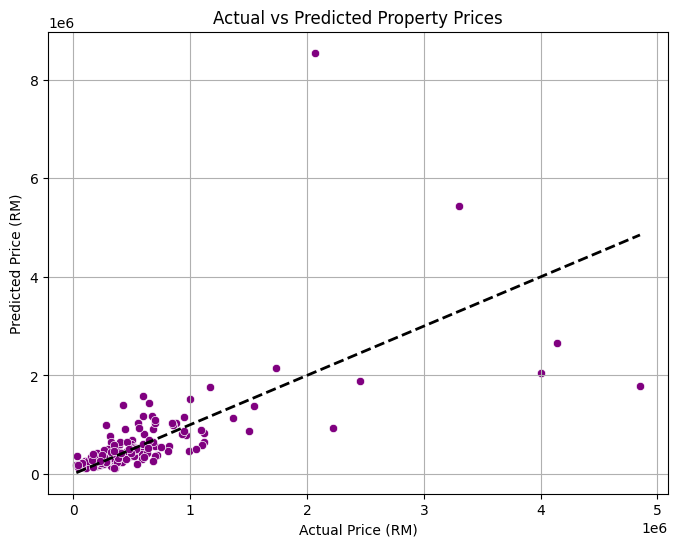

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare dataset
data['Transaction Price'] = data['Transaction Price'].replace({'RM': '', ',': ''}, regex=True).astype(float)
data['Main Floor Area'] = pd.to_numeric(data['Main Floor Area'], errors='coerce').fillna(0)
data['Land/Parcel Area'] = pd.to_numeric(data['Land/Parcel Area'], errors='coerce').fillna(0)

# Amenities to numeric
amenity_columns = ['school', 'kindergarten', 'university', 'hospital', 'clinic',
                   'supermarket', 'place_of_worship', 'bus_station', 'marketplace']
for col in amenity_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0}).fillna(0)

# Feature Set
features = ['Main Floor Area', 'Land/Parcel Area'] + amenity_columns
X = data[features]
y = data['Transaction Price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: RM{mae:,.2f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price (RM)")
plt.ylabel("Predicted Price (RM)")
plt.title("Actual vs Predicted Property Prices")
plt.grid(True)
plt.show()


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load dataset

# Clean numeric features
data['Transaction Price'] = data['Transaction Price'].replace({'RM': '', ',': ''}, regex=True).astype(float)
data['Main Floor Area'] = pd.to_numeric(data['Main Floor Area'], errors='coerce').fillna(0)
data['Land/Parcel Area'] = pd.to_numeric(data['Land/Parcel Area'], errors='coerce').fillna(0)

# Map amenity columns
amenity_columns = ['school', 'kindergarten', 'university', 'hospital', 'clinic',
                   'supermarket', 'place_of_worship', 'bus_station', 'marketplace']
for col in amenity_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0}).fillna(0)

# Features → include District (categorical) now
features_num = ['Main Floor Area', 'Land/Parcel Area'] + amenity_columns
features_cat = ['District', 'Property Type']

X = data[features_num + features_cat]
y = data['Transaction Price']

# Categorical encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', features_num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_cat)
    ])

# Use Gradient Boosting with GridSearchCV for hyperparameter tuning
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Example param grid for tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Fit with tuning
grid.fit(X_train, y_train)

# Predict
y_pred = grid.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid.best_params_}")
print(f"MAE: RM{mae:,.2f}")
print(f"RMSE: RM{rmse:,.2f}")
print(f"R²: {r2:.2%}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
MAE: RM210,868.53
RMSE: RM897,637.68
R²: -106.50%


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Example printing in your existing loop
for r in results:
    r2 = r2_score(y_test, r['y_pred'])
    rmse = np.sqrt(mean_squared_error(y_test, r['y_pred']))
    
    print(f"{r['Model']}:")
    print(f" → MAE  : RM{r['MAE']:.2f}")
    print(f" → RMSE : RM{rmse:.2f}")
    print(f" → R²   : {r2:.2%}")   # Display as percentage for 'accuracy-like' readability

Gradient Boosting:
 → MAE  : RM239325.35
 → RMSE : RM724818.02
 → R²   : -34.64%
Random Forest:
 → MAE  : RM241455.64
 → RMSE : RM631204.45
 → R²   : -2.11%
Linear Regression:
 → MAE  : RM283613.36
 → RMSE : RM432633.12
 → R²   : 52.03%
